# Label Propagation

## Label propagation is similar to training a classification model and then using that model to make predictions on test data. The key difference is that in general, our analogue to the test data has no labels against which to evaluate our model. In this exercise, we keep the entire set of true labels for illustrative purposes, but the vast marjority of them play no role in training the model. 

## This exercise is adapted from scikit-learn's [tutorial](https://scikit-learn.org/stable/auto_examples/semi_supervised/plot_label_propagation_digits.html) on zero shot learning .

### Load the necessary modules and functions

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from scipy import stats

from sklearn import datasets
from sklearn.semi_supervised import LabelSpreading

from sklearn.metrics import confusion_matrix, classification_report

In /Users/leo/anaconda3/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /Users/leo/anaconda3/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /Users/leo/anaconda3/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.


### Exercise: Load and preprocess the data. 
1. Shuffle the indices
2. Use the shuffled indices to extract 1000 random samples from the features data
3. Extract the corresponding 1000 labels and images
4. Copy the labels. Treat the first 50 shuffled samples as labeled data and the rest as unlabeled data. Replace the labels after the first 50 with -1.

We'll use this copy of our labels (with 50 labels known and the other 950 hidden) to train our model, and use the original copy (with all 1000 labels known) to evaluate the model.

In [35]:
# Load the digits dataset
# digits = {data,target,indices}; n = 1797
digits = datasets.load_digits()

# Set the random state to 2 for reproducibility
rng = np.random.RandomState(2)

### START CODE HERE ###
# Initialize the indices as an ordered array, with each element corresponding to a sample in the dataset
indices = np.arange(digits['data'].shape[0])

# Shuffle the indices
rng.shuffle(indices)

# Use the shuffled indices to extract 1000 feature vectors, labels, and images
n_total_samples = 1000
# Features
X = digits['data'][indices[:n_total_samples]]
# Labels
y = digits['target'][indices[:n_total_samples]]
# Images
images = digits['images'][indices[:n_total_samples]]

# Copy the labels
n_labeled_points = 50
y_train = np.concatenate((y[:n_labeled_points], np.full((n_total_samples - n_labeled_points,), -1)), axis=0)

# Replace all of the elements of y_train after the first 50 with -1, rendering them unlabeled
#n_labeled_points = 50
# Create an ordered array of indices of the training data
#train_indices = None
# Define the training data indices after n_labeled_points as unlabeled
#unlabeled_set = None
# Conduct the label replacement
#y_train[unlabeled_set] = None
### END CODE HERE ###

### Verify that the labels are randomly distributed and all the labels after the first 50 in `y_train` are hidden

In [46]:
print(X.shape)
print(y_train[0:100])

(1000, 64)
[ 4  0  9  1  4  7  1  5  1  6  6  7  6  1  5  5  4  6  2  7  4  6  4  1
  5  2  9  5  4  6  5  6  3  4  0  9  9  8  4  6  8  8  5  7  9  6  9  6
  1  3 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1]


### Exercise: Train the label propagation model with `gamma = 0.25` and `max_iter = 20`

### Make sure you pass in the correct version of the target array, i.e. the one containing unlabeled data

In [37]:
### START CODE HERE ###
# Initialize the model
lp_model = LabelSpreading(gamma=0.25, max_iter=20)
# Train the model
lp_model.fit(X, y_train)
### END CODE HERE ###

LabelSpreading(gamma=0.25, max_iter=20)

### Exercise: Evaluate the model's performance on the unlabeled data

In [38]:
### START CODE HERE ###
# Extract the label predictions for the unlabeled data
predicted_labels = lp_model.transduction_[n_labeled_points:]
# Extract the true labels of the unlabeled data
true_labels = y[n_labeled_points:]
# Compute the confusion matrix between the true and predicted labels of the unlabeled data
cm = confusion_matrix(true_labels, predicted_labels)
### END CODE HERE ###
print("Label Spreading model: %d labeled & %d unlabeled points (%d total)" %
      (n_labeled_points, n_total_samples - n_labeled_points, n_total_samples))

print(classification_report(true_labels, predicted_labels))

print("Confusion matrix")
print(cm)

Label Spreading model: 50 labeled & 950 unlabeled points (1000 total)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        98
           1       0.85      0.90      0.88        93
           2       0.99      0.78      0.87        91
           3       0.92      0.90      0.91       108
           4       0.97      1.00      0.98        88
           5       0.97      0.93      0.95       102
           6       0.97      1.00      0.99       100
           7       0.98      0.91      0.94        91
           8       0.86      0.82      0.84        87
           9       0.77      0.97      0.86        92

    accuracy                           0.92       950
   macro avg       0.93      0.92      0.92       950
weighted avg       0.93      0.92      0.92       950

Confusion matrix
[[ 98   0   0   0   0   0   0   0   0   0]
 [  0  84   0   0   1   1   0   0   3   4]
 [  0  12  71   0   0   0   0   1   7   0]
 [  0   0   0  97   0   0

### Exercise: Find the 10 most uncertain labels in descending order of uncertainty, i.e. the labels for which the model made the least confident predictions. Plot the associated images. Observe any discrepancies between predicted and true labels. Do you see any patterns? What might account for them? 

[473 809 740 626 873  54 143 155 375 357]
[0.65003081 0.48779136 0.48764622 0.48700257 0.48512273 0.33596083
 0.23396067 0.16388711 0.13355769 0.08852858]


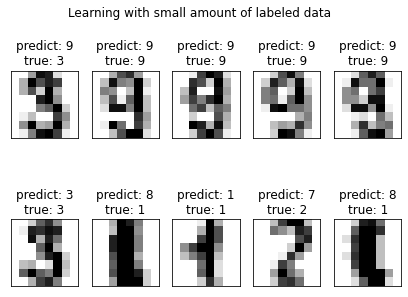

In [45]:
### START CODE HERE ###
# Calculate uncertainty values for each transduced distribution
# You may scipy stats' entropy() function useful.
pred_entropies = np.array([stats.entropy(sample_dist) for sample_dist in lp_model.label_distributions_])

# Pick the top 10 most uncertain labels, in descending order of uncertainty
uncertainty_index = np.argsort(pred_entropies)[::-1][:10]
print(uncertainty_index)
print(pred_entropies[uncertainty_index])
### END CODE HERE ###

# Plot
f = plt.figure(figsize=(7, 5))
for index, image_index in enumerate(uncertainty_index):
    image = images[image_index]

    sub = f.add_subplot(2, 5, index + 1)
    sub.imshow(image, cmap=plt.cm.gray_r)
    plt.xticks([])
    plt.yticks([])
    sub.set_title('predict: %i\ntrue: %i' % (
        lp_model.transduction_[image_index], y[image_index]))

f.suptitle('Learning with small amount of labeled data')
plt.show()

## Analysis
The model is least certain about the distinction between 3 and 9. Occasionally, it is also uncertain about 1 and 8, as well as 2 and 7. These uncertainties make sense; each of those pairs of numbers looks similar when the digits are drawn especially curly, fat, or truncated.

### Exercise: Repeat the experiment with 10, 100, and 250 labeled images. How do the differing numbers of labeled samples affect the model's performance? Which number detections yield the most errors?



In [62]:
def run_experiment(n_total_samples, n_labeled_points):
    """Runs the experiment with the given number of points labeled.
    :param n_total_samples: the total number of points to use.
    :param n_labeled_points: the number of points to label.
    """
    digits = datasets.load_digits()
    # Set the random state to 2 for reproducibility
    rng = np.random.RandomState(2)
    # Initialize the indices as an ordered array, with each element corresponding to a sample in the dataset
    indices = np.arange(digits['data'].shape[0])
    # Shuffle the indices
    rng.shuffle(indices)
    # Features
    X = digits['data'][indices[:n_total_samples]]
    # Labels
    y = digits['target'][indices[:n_total_samples]]
    # Images
    images = digits['images'][indices[:n_total_samples]]
    # Copy the labels
    y_train = np.concatenate((y[:n_labeled_points], np.full((n_total_samples - n_labeled_points,), -1)), axis=0)
    print(X.shape)
    print(y_train[:100])
    # Initialize the model
    lp_model = LabelSpreading(gamma=0.25, max_iter=20)
    # Train the model
    lp_model.fit(X, y_train)
    # Extract the label predictions for the unlabeled data
    predicted_labels = lp_model.transduction_[n_labeled_points:]
    # Extract the true labels of the unlabeled data
    true_labels = y[n_labeled_points:]
    # Compute the confusion matrix between the true and predicted labels of the unlabeled data
    cm = confusion_matrix(true_labels, predicted_labels)
    print("Label Spreading model: %d labeled & %d unlabeled points (%d total)" %
          (n_labeled_points, n_total_samples - n_labeled_points, n_total_samples))
    print(classification_report(true_labels, predicted_labels))
    print("Confusion matrix")
    print(cm)
    # Calculate uncertainty values for each transduced distribution
    # You may scipy stats' entropy() function useful.
    pred_entropies = np.array([stats.entropy(sample_dist) for sample_dist in lp_model.label_distributions_])
    # Pick the top 10 most uncertain labels, in descending order of uncertainty
    uncertainty_index = np.argsort(pred_entropies)[::-1][:10]
    print(uncertainty_index)
    print(pred_entropies[uncertainty_index])
    # Plot
    f = plt.figure(figsize=(7, 5))
    for index, image_index in enumerate(uncertainty_index):
        image = images[image_index]
        sub = f.add_subplot(2, 5, index + 1)
        sub.imshow(image, cmap=plt.cm.gray_r)
        plt.xticks([])
        plt.yticks([])
        sub.set_title('predict: %i\ntrue: %i' % (
            lp_model.transduction_[image_index], y[image_index]))
    f.suptitle('Learning with small amount of labeled data')
    plt.show()
    

(1000, 64)
[ 4  0  9  1  4  7  1  5  1  6 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1]
Label Spreading model: 10 labeled & 990 unlabeled points (1000 total)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        99
           1       0.40      0.93      0.56        96
           2       0.00      0.00      0.00        93
           3       0.00      0.00      0.00       110
           4       0.76      0.97      0.85        94
           5       0.92      0.94      0.93       108
           6       0.95      0.99      0.97       109
           7       0.91      0.99      0.95        94
           8       0.00      0.00      0.00        90
           9       0.34      0.77      0.47        97

    accuracy     

/Users/leo/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


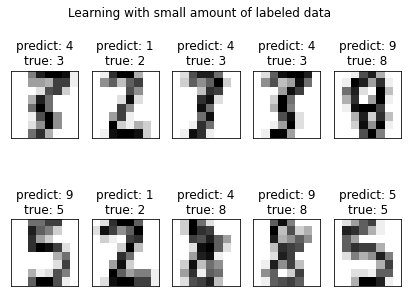

In [63]:
run_experiment(1000, 10)

## Analysis
Based on the confusion matrix, the model classified most of the 2 samples as 1, most of the 3 samples as 9, and many of the 8 samples as 1. The model never predicted 2, 3, or 8 because none of those samples were in the labeled data. This particular semi-supervised algorithm cannot predict a class that was never seen in the labeled data. However, it also correctly classifies every single 0 sample, even though there was only one example of a 0 in the labeled data.

(1000, 64)
[4 0 9 1 4 7 1 5 1 6 6 7 6 1 5 5 4 6 2 7 4 6 4 1 5 2 9 5 4 6 5 6 3 4 0 9 9
 8 4 6 8 8 5 7 9 6 9 6 1 3 0 1 9 7 3 3 1 1 8 8 9 8 5 4 4 7 3 5 8 4 3 1 3 8
 7 3 3 0 8 7 2 8 5 3 8 7 6 4 6 2 2 0 1 1 5 3 5 7 6 8]
Label Spreading model: 100 labeled & 900 unlabeled points (1000 total)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        95
           1       0.92      0.99      0.96        87
           2       1.00      0.90      0.95        88
           3       0.93      0.96      0.95        99
           4       0.98      1.00      0.99        84
           5       0.97      0.93      0.95        97
           6       1.00      1.00      1.00        97
           7       1.00      0.91      0.95        85
           8       0.96      0.92      0.94        78
           9       0.83      0.96      0.89        90

    accuracy                           0.96       900
   macro avg       0.96      0.96      0.96       900
weighted a

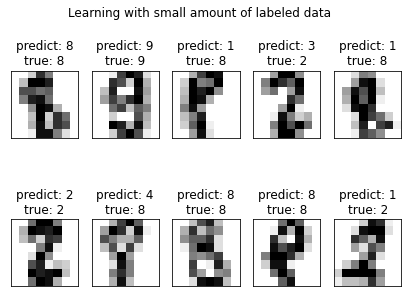

In [64]:
run_experiment(1000, 100)

## Analysis
With 100 labeled examples, accuracy is far higher and uncertainty is lower. Precision for label 9 is low because the model predicts label 9 frequently for 3, 5, and 7.

(1000, 64)
[4 0 9 1 4 7 1 5 1 6 6 7 6 1 5 5 4 6 2 7 4 6 4 1 5 2 9 5 4 6 5 6 3 4 0 9 9
 8 4 6 8 8 5 7 9 6 9 6 1 3 0 1 9 7 3 3 1 1 8 8 9 8 5 4 4 7 3 5 8 4 3 1 3 8
 7 3 3 0 8 7 2 8 5 3 8 7 6 4 6 2 2 0 1 1 5 3 5 7 6 8]
Label Spreading model: 250 labeled & 750 unlabeled points (1000 total)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        81
           1       0.93      0.97      0.95        70
           2       1.00      0.90      0.95        70
           3       0.91      0.99      0.95        80
           4       1.00      1.00      1.00        73
           5       0.99      0.93      0.96        81
           6       1.00      1.00      1.00        86
           7       1.00      0.99      0.99        67
           8       0.94      0.89      0.91        66
           9       0.89      0.96      0.92        76

    accuracy                           0.96       750
   macro avg       0.97      0.96      0.96       750
weighted a

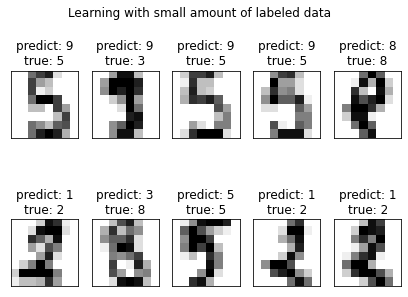

In [65]:
run_experiment(1000, 250)

## Analysis
With 250 labeled examples, the performance is even better, although the model still mistakes 5 for 9 frequently.

# Conclusion
Even with a small fraction of labeled data, semi-supervised algorithms can create effective classifiers. More labeled samples yield a better model, although a model can be surprisingly effective with only a single example from a given class.